<a href="https://colab.research.google.com/github/m-santh/AicoreKaggle/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import os
#os.chdir("../../Kaggle/")

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

data_X = np.load('/content/drive/MyDrive/AiCore/X_train.npy')
data_Y = np.load('/content/drive/MyDrive/AiCore/y_train.npy')
data_Y = data_Y.astype(int) 
test_data = np.load('/content/drive/MyDrive/AiCore/X_test.npy')

print(np.shape(data_X))

print(np.shape(data_Y))

print(np.shape(test_data))

scaler = MinMaxScaler()
#scaler = StandardScaler()

#scaler.fit_transform(X=data_X)

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, random_state = 37)

from sklearn.neighbors import KNeighborsClassifier 
#knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train) 
knn = KNeighborsClassifier()
  
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)#Making model
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])#Predict testing set
y_pred = best_model.predict(X_test)#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy)
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
print(cm)

(10000, 100)
(10000,)
(40000, 100)


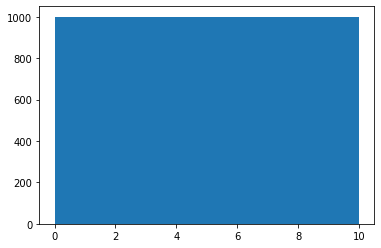

In [8]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(data_Y, bins = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 
  
# Show plot 
plt.show() 